In [1]:
from sklearn import datasets as ds
import numpy as np
from IPython.display import display, clear_output

In [2]:
X, y = ds.make_blobs(n_samples=64, centers=2, n_features=2)
print(X.shape)

(64, 2)


In [3]:
from matplotlib import pyplot as plt

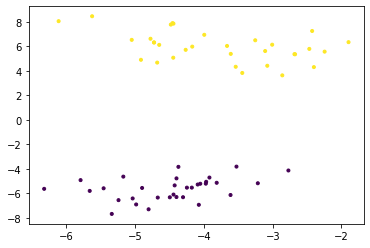

In [4]:
plt.scatter(X[:,0],X[:,1],marker='.',c=y)
plt.show()

In [5]:
class Logistic:
    def __init__(self, lr = 0.001, iters=100, display = False):
        self.lr = lr
        self.iters = iters
        
        self.w = None
        self.b = None
        
        self.disp = display
        
    def fit(self, X, y):
        if self.disp:
            fig = plt.figure()
            ax = fig.add_subplot(1, 1, 1) 
            
        n, d = X.shape
        y = np.expand_dims(y, -1) # n x 1
        
        self.w = np.zeros((1, d))
        self.b = 0
        
        for i in range(self.iters):
            yhat = self.sigmoid(np.matmul(X, self.w.T) + self.b)
            
            dLdw = np.mean((yhat - y) * X, 0) # AXIS
            dLdb = np.mean(yhat - y)
            
            self.w -= self.lr * dLdw
            self.b -= self.lr * dLdb
            
            if self.disp:
                ax.cla()
                ax.scatter(X[:,0],X[:,1],marker='.',c=yhat)
                display(fig)    
                clear_output(wait = True)
                plt.pause(0.1)
            
    def sigmoid(self,x):
        return 1./(1.+np.exp(-x))
    
    def predict(self, X):
        return self.sigmoid(np.matmul(X, self.w.T) + self.b)

In [6]:
cls = Logistic(lr = 0.001, iters=100, display = False)
cls.fit(X, y)
print(cls.w, cls.b)

[[0.01140176 0.19912276]] 0.00016994667420916514


In [7]:
Y = cls.predict(X)
# print(Y)
print(np.where(Y>0.5, 1, 0).ravel())
print(y)

[0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1
 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0]
[0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1
 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0]
